<a href="https://colab.research.google.com/github/JuneSHYoo/AI_DeepLearning/blob/main/assignment/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## HW 2
Answer folloing questions 



### Below is one of the example code for binary-class classification problem on IMDB dataset

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [2]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [3]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [4]:
y_train[:5]

array([1., 0., 0., 1., 0.], dtype=float32)

In [5]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [6]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [7]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [8]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 56ms/step - loss: 0.5158 - accuracy: 0.7860 - val_loss: 0.3919 - val_accuracy: 0.8692
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3089 - accuracy: 0.8997 - val_loss: 0.3057 - val_accuracy: 0.8891
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2242 - accuracy: 0.9287 - val_loss: 0.2787 - val_accuracy: 0.8923
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1769 - accuracy: 0.9440 - val_loss: 0.2743 - val_accuracy: 0.8919
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1431 - accuracy: 0.9535 - val_loss: 0.2821 - val_accuracy: 0.8892
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1167 - accuracy: 0.9644 - val_loss: 0.3129 - val_accuracy: 0.8803
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0997 - accuracy: 0.9696 - val_loss: 0.3150 - val_accuracy: 0.8836
Epoch 8/20
30

### Q1 Binary classification is multi-class classification with two classes so we can modify our model as below:

In [9]:
model2 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(2, activation="softmax")
])

### Complete the codes for compile and model fitting. 

In [10]:
#model2.compile()

model2.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

#model2.fit()

history_multi = model2.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 45ms/step - loss: 0.4971 - accuracy: 0.7965 - val_loss: 0.3809 - val_accuracy: 0.8663
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2956 - accuracy: 0.9027 - val_loss: 0.3070 - val_accuracy: 0.8829
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2191 - accuracy: 0.9255 - val_loss: 0.2821 - val_accuracy: 0.8887
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1725 - accuracy: 0.9428 - val_loss: 0.2948 - val_accuracy: 0.8781
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1404 - accuracy: 0.9534 - val_loss: 0.3254 - val_accuracy: 0.8700
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1148 - accuracy: 0.9637 - val_loss: 0.3101 - val_accuracy: 0.8805
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0940 - accuracy: 0.9712 - val_loss: 0.3174 - val_accuracy: 0.8801
Epoch 8/20
30

### Q2 Below is visualization of the validation loss. We can see overfitting after 5 epochs.  

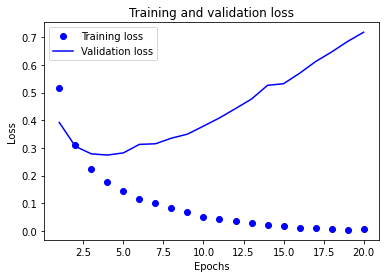

In [12]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Add dropout layers and visualize the validation loss of your new model.

Epoch 1/20
30/30 [==============================] - 2s 41ms/step - loss: 0.6378 - accuracy: 0.6415 - val_loss: 0.5435 - val_accuracy: 0.8456
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.5019 - accuracy: 0.7757 - val_loss: 0.3810 - val_accuracy: 0.8734
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.4121 - accuracy: 0.8395 - val_loss: 0.3370 - val_accuracy: 0.8721
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3411 - accuracy: 0.8708 - val_loss: 0.2912 - val_accuracy: 0.8885
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2957 - accuracy: 0.8911 - val_loss: 0.2839 - val_accuracy: 0.8832
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2567 - accuracy: 0.9089 - val_loss: 0.2788 - val_accuracy: 0.8869
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2291 - accuracy: 0.9201 - val_loss: 0.2929 - val_accuracy: 0.8865
Epoch 8/20
30

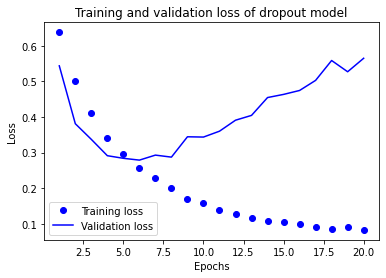

In [13]:
## Add dropout layers 

model2_dr = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5), 
    layers.Dense(2, activation="softmax")
])

## retrain and visualize the validation loss of new model

model2_dr.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history_multi_dr = model2_dr.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dr = history_multi_dr.history
loss_values = history_dr["loss"]
val_loss_values = history_dr["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss of dropout model")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Q3 Add l1 regularization on the second dense layer from the original model below. 

In [14]:
## Add l1 regularization on the second dense layers 
from tensorflow.keras import regularizers

model2_l1 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, kernel_regularizer= regularizers.l1(0.001),  activation="relu"),    ### add l1 regularization here
    layers.Dense(2, activation="softmax")
])

model2_l1.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history_l1 = model2_l1.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 40ms/step - loss: 0.5865 - accuracy: 0.7795 - val_loss: 0.4683 - val_accuracy: 0.8390
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3747 - accuracy: 0.8970 - val_loss: 0.3652 - val_accuracy: 0.8807
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2818 - accuracy: 0.9225 - val_loss: 0.3545 - val_accuracy: 0.8695
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2267 - accuracy: 0.9391 - val_loss: 0.3126 - val_accuracy: 0.8917
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1880 - accuracy: 0.9530 - val_loss: 0.3141 - val_accuracy: 0.8900
Epoch 6/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1626 - accuracy: 0.9587 - val_loss: 0.3497 - val_accuracy: 0.8796
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1364 - accuracy: 0.9706 - val_loss: 0.3350 - val_accuracy: 0.8865
Epoch 8/20
30

### Finish the training and compare the dropout model(model from Q2) and l1 regularization model after visualizing their validation losses.

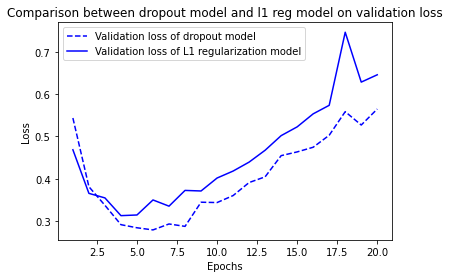

In [15]:
val_loss_dr = history_multi_dr.history["val_loss"]
val_loss_l1 = history_l1.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss_dr , "b--",
         label="Validation loss of dropout model")
plt.plot(epochs, val_loss_l1, "b-",
         label="Validation loss of L1 regularization model")
plt.title("Comparison between dropout model and l1 reg model on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

- The validation loss of both model are overfitting after around 5 epochs.
- It seems validation loss of L1 regularization model is larger in general. 
- So the dropout model performs better than L1 regularization model.